This Notebook will demonstrate the importance of creating separate datasets to train and test your Machine Learning models. We will then look at how to create these training and testing datasets.





For once we don't need to mount

Import the libraries used by this tutorial. Libraries contain programmes that people have already written to save you re-inventing the wheel.

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

The following code will draw 3 graphs to demonstrate what is termed 'underfitting' and 'overfitting'.

The blue points in each graph have been generated by a mathematical function. You can see what this function looks like by looking at the orange curve. The reason the dots don't all fall neatly on this line is that some random noise was added in when generating them. Our job is to try and derive the original function and we do this by attempting to draw a line through the dots which is a best approximation to the true function. In real life we wouldn't have the orange curve! The blue line is our estimated function which, in this case, we can compare to the orange one.

Run the following program and then read the commentary below the graphs which are produced after the code. If you're interested in what the code is doing (skip to running the code if you're not)...



*   Generates a random sample of values and passes them through the function:
> $Y = cos(1.5 * \pi * X)$


*   Then it adds a random value to each value after the function. This introduces noise to the data.
*   There are then 3 attempts to fit a line to the data. We are looking for the line that best approximates the orange curve.

*   The lines are fitted using a technique called linear regression.
*   In the cases of graphs 2 and 3 it is fitting a polynomial to the data, which just means the line can be wiggly.










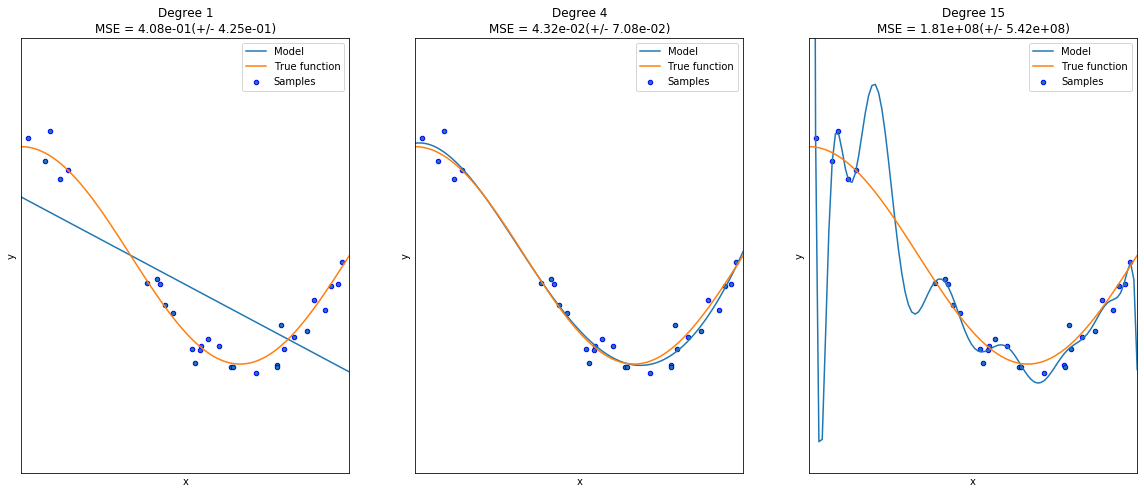

In [2]:

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(20, 8))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

The first graph is an example of underfitting. The blue line is straight but the orange one is clearly non-linear. This is because the model we're using is too simple and assumes a straight line relationship between the X and Y variables.

The second graph looks pretty good. We have allowed the model to use powers of X up to $x^4$ which gives it enough flexibility to fit a neat curve through the dots.

The third graph is an example of overfitting. Here the model is fitting a function with powers of up to $x^{15}$. This results in a curve with massive flexibility such that it is able to pass through many of the blue points. If we evaluate this function just against the sample data it is being fitted too it will report that it has done a fantastic job and is much more accurate than the middle graph. But we can clearly see that it isn't following the orange curve well at all!

This is our motivation for creating separate training and testing datasets.